In [1]:
import pandas as pd
import numpy as np
from numpy import absolute, mean, std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn import preprocessing
import matplotlib.pyplot as mtpl
import seaborn  as sbrn

In [2]:
df = pd.read_csv('df.csv')

In [3]:
len(df)

301

In [4]:
df.head()

,Résident,Chambre,Etage,GIR,Protocole,Day Type,Semaine de l'année,Durée en Minutes,Mois,Année,Trimestre,Jour
0,3,70,1er,1,Entretien courant Avancé,Weekday,8,4.850933,2,2022,Trim 1,17
1,3,70,1er,1,Entretien courant Avancé,Weekday,3,9.375583,1,2022,Trim 1,12
2,3,70,1er,1,Entretien courant Avancé,Weekday,10,15.396083,3,2022,Trim 1,2
3,11,59,3ème,1,Entretien courant Avancé,Weekday,21,5.108050,5,2022,Trim 2,16
4,11,59,3ème,1,Entretien courant Avancé,Weekday,34,8.391583,8,2022,Trim 3,17


In [5]:
first_column = df.pop('Durée en Minutes')
df.insert(0, 'Durée en Minutes', first_column)

In [6]:
df.head()

,Durée en Minutes,Résident,Chambre,Etage,GIR,Protocole,Day Type,Semaine de l'année,Mois,Année,Trimestre,Jour
0,4.850933,3,70,1er,1,Entretien courant Avancé,Weekday,8,2,2022,Trim 1,17
1,9.375583,3,70,1er,1,Entretien courant Avancé,Weekday,3,1,2022,Trim 1,12
2,15.396083,3,70,1er,1,Entretien courant Avancé,Weekday,10,3,2022,Trim 1,2
3,5.108050,11,59,3ème,1,Entretien courant Avancé,Weekday,21,5,2022,Trim 2,16
4,8.391583,11,59,3ème,1,Entretien courant Avancé,Weekday,34,8,2022,Trim 3,17


In [7]:
label_encoder = preprocessing.LabelEncoder()
df['Etage']= label_encoder.fit_transform(df['Etage'])
df['Protocole']= label_encoder.fit_transform(df['Protocole'])
df['Day Type']= label_encoder.fit_transform(df['Day Type'])
df['Trimestre']= label_encoder.fit_transform(df['Trimestre'])
df.head()

,Durée en Minutes,Résident,Chambre,Etage,GIR,Protocole,Day Type,Semaine de l'année,Mois,Année,Trimestre,Jour
0,4.850933,3,70,1,1,1,0,8,2,2022,0,17
1,9.375583,3,70,1,1,1,0,3,1,2022,0,12
2,15.396083,3,70,1,1,1,0,10,3,2022,0,2
3,5.108050,11,59,3,1,1,0,21,5,2022,1,16
4,8.391583,11,59,3,1,1,0,34,8,2022,2,17


In [8]:
#Selection en X de la colonne GIR et Protocole
x = X = df.loc[:,['GIR','Protocole']]
#Selection en Y de la colonne durée en minutes
y = y = df.iloc[:,0]


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)
#Séparation en partie apprentissage et test

In [10]:
from sklearn.linear_model import ElasticNet
reg  = ElasticNet(alpha=0.1)
reg.fit(x_train, y_train)

Ridge(alpha=0.1)

In [11]:
#Interprétation du modèle obtenu. 
print(reg.intercept_, reg.coef_)

11.43545099666828 [-1.10550172  0.13232191]


In [12]:
y_pred = reg.predict(x_test)

In [13]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [14]:
scores = cross_val_score(reg, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [15]:
from sklearn import preprocessing, metrics

scores = absolute(scores)
print('R2 score: {0:.2f}'.format(metrics.r2_score(y_test, y_pred)))
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

R2 score: 0.02
Mean MAE: 3.803 (0.674)


Notre R² étant très proche de 0, il est simple de conclure qu'avec les features utilisé le modèle n'est pas adéquat avec ce genre de régression.


# Uniquement en fonction du GIR des résidents


In [16]:
#Selection en X de la colonne GIR
x = X = df.loc[:,['GIR']]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)
#Séparation en partie apprentissage et test

In [18]:
reg  = ElasticNet(alpha=0.1)
reg.fit(x_train, y_train)

ElasticNet(alpha=0.1)

## Données d'apprentissage

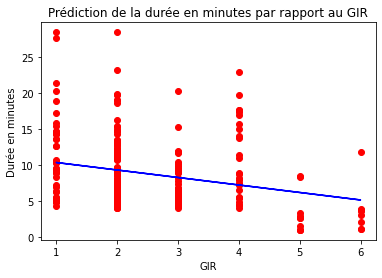

In [19]:
# maintenant on passe à la prédiction, donc on applique notre modèle sur le dataset x_test 
y_predic = reg.predict(x_test)

# On passe à la visualisation pour valider et évaluer notre modèle sur nos données d'apprentissage. ( on utilise  matplotlib)
# pour visualiser un nuage de point on utilise la fonction scatter 
mtpl.scatter(x_train, y_train, color='red')
mtpl.plot(x_train, reg.predict(x_train), color='blue')
mtpl.title("Prédiction de la durée en minutes par rapport au GIR")
# on nomme les axes , x et y du graphique 
mtpl.xlabel("GIR")
mtpl.ylabel('Durée en minutes')
mtpl.show()

## Données de test

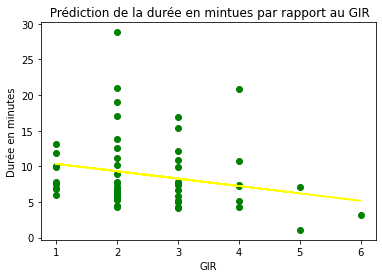

In [20]:
# Pour évaluer notre modèle sur les données de test.

mtpl.scatter(x_test, y_test, color='green')
mtpl.plot(x_test, reg.predict(x_test), color='yellow')
mtpl.title(" Prédiction de la durée en mintues par rapport au GIR")
# on nomme les axes , x et y du graphique 
mtpl.xlabel('GIR')
mtpl.ylabel('Durée en minutes')
mtpl.show()

In [21]:
import statsmodels.api as sm

model = sm.OLS(y_train, x_train)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:       Durée en Minutes   R-squared (uncentered):                   0.528
Model:                            OLS   Adj. R-squared (uncentered):              0.526
Method:                 Least Squares   F-statistic:                              267.2
Date:                Sun, 11 Dec 2022   Prob (F-statistic):                    8.03e-41
Time:                        14:23:58   Log-Likelihood:                         -806.35
No. Observations:                 240   AIC:                                      1615.
Df Residuals:                     239   BIC:                                      1618.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


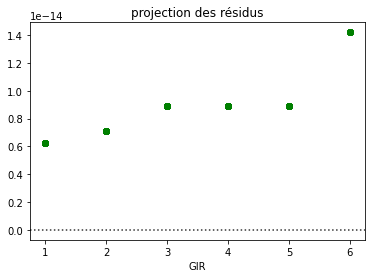

In [22]:
model_residuals = results.resid

# Visualisons le residual plot (projection des résidus)
model_fitted_y = results.fittedvalues
sbrn.residplot(x_train, model_fitted_y, color="g") 
mtpl.title("projection des résidus")
mtpl.show()


Etant donné que l'échelle soit à 1e^-14 on pourrait se dire que la prédiction n'est pas si mauvaise que ça surtout si l'on prend en compte le fait que ce que l'on essaye de prédire soit des minutes avec 6 chiffres après la virgule.
Cependant vraiment aucune des projections résiduels n'atteint 0 ce qui ne drvraient pas être le cas lors d'une bonne prédiction
